In [ ]:
# Install packages
!pip install --quiet duckdb
!pip install --quiet jupysql
!pip install --quiet duckdb-engine
!pip install --quiet pandas

# Import modules
import duckdb
import pandas as pd
from google.colab import data_table as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('tableau-colorblind10')
# plt.style.use('ggplot')
dt.enable_dataframe_formatter()

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# We configure jupysql to return data as a Pandas dataframe and have less verbose output
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string.
%sql duckdb:///:memory:

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 785.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.3/414.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.2 MB/s eta 0:00:00
Deploy AI and data apps for free on Ploomber Cloud! Learn more: https://docs.cloud.ploomber.io/en/latest/quickstart/signup.html


In [ ]:
# !git clone https://{token}@github.com/matthieuahkoon/twelve.git

!git clone https://github.com/matthieuahkoon/twelve.git



Cloning into 'twelve'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 72 (delta 13), reused 25 (delta 2), pack-reused 0
Receiving objects: 100% (72/72), 14.90 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
!pwd
%cd '/content/twelve/'

!pwd
# %mkdir '/content/twelve/data/raw'
# %mkdir '/content/twelve/data/staging'

/content
/content/twelve
/content/twelve


In [ ]:
!git config --global user.email "matthieu.ahkoon@me.com"
!git config --global user.name "matthieu.ahkoon"
!git pull
# !git add '/content/twelve/data/twelve_publishers.db'
# !git add '/content/twelve/data/staging/publisher_revenue_breakdown.csv'
# !git commit -m "Move file to new directory"
# !git push -f origin main


Already up to date.


In [ ]:

revenue_song = pd.read_csv('/content/twelve/data/raw/Revenue_Information_by_Song.csv')
author = pd.read_csv('/content/twelve/data/raw/Author_Information.csv')

In [ ]:
%%sql

select * from revenue_song limit 5;

,author_id,song_id,year,format,revenue
0,66,1,2015,CD,0
1,396,2,2015,CD,0
2,92,3,2015,CD,0
3,928,4,2015,CD,19
4,642,5,2015,CD,0


In [ ]:
%%sql

select * from revenue_song limit 5;

,author_id,song_id,year,format,revenue
0,66,1,2015,CD,0
1,396,2,2015,CD,0
2,92,3,2015,CD,0
3,928,4,2015,CD,19
4,642,5,2015,CD,0


In [ ]:
author_count_check = """ SELECT COUNT(DISTINCT author_id) AS unique_author_count, COUNT(*) AS author_count FROM author """

results = duckdb.sql(author_count_check).df()
print(results)

   unique_author_count  author_count
0                 1000          1000


In [ ]:
song_count_check = """ SELECT COUNT(DISTINCT song_id) AS unique_song_count, COUNT(DISTINCT author_id) AS unique_author_count, COUNT(*) AS songs_revenue_rows FROM revenue_song """

results = duckdb.sql(song_count_check).df()
print(results)

   unique_song_count  unique_author_count  songs_revenue_rows
0               6545                 1000              235620


In [ ]:
format_values = """ SELECT DISTINCT format FROM revenue_song """

results = duckdb.sql(format_values).df()
print(results)

    format
0       CD
1  Digital
2    Radio
3       TV


In [ ]:
years_values = """ SELECT DISTINCT year FROM revenue_song  order by year asc"""

results = duckdb.sql(years_values).df()
print(results)

   year
0  2015
1  2016
2  2017
3  2018
4  2019
5  2020
6  2021
7  2022
8  2023


9


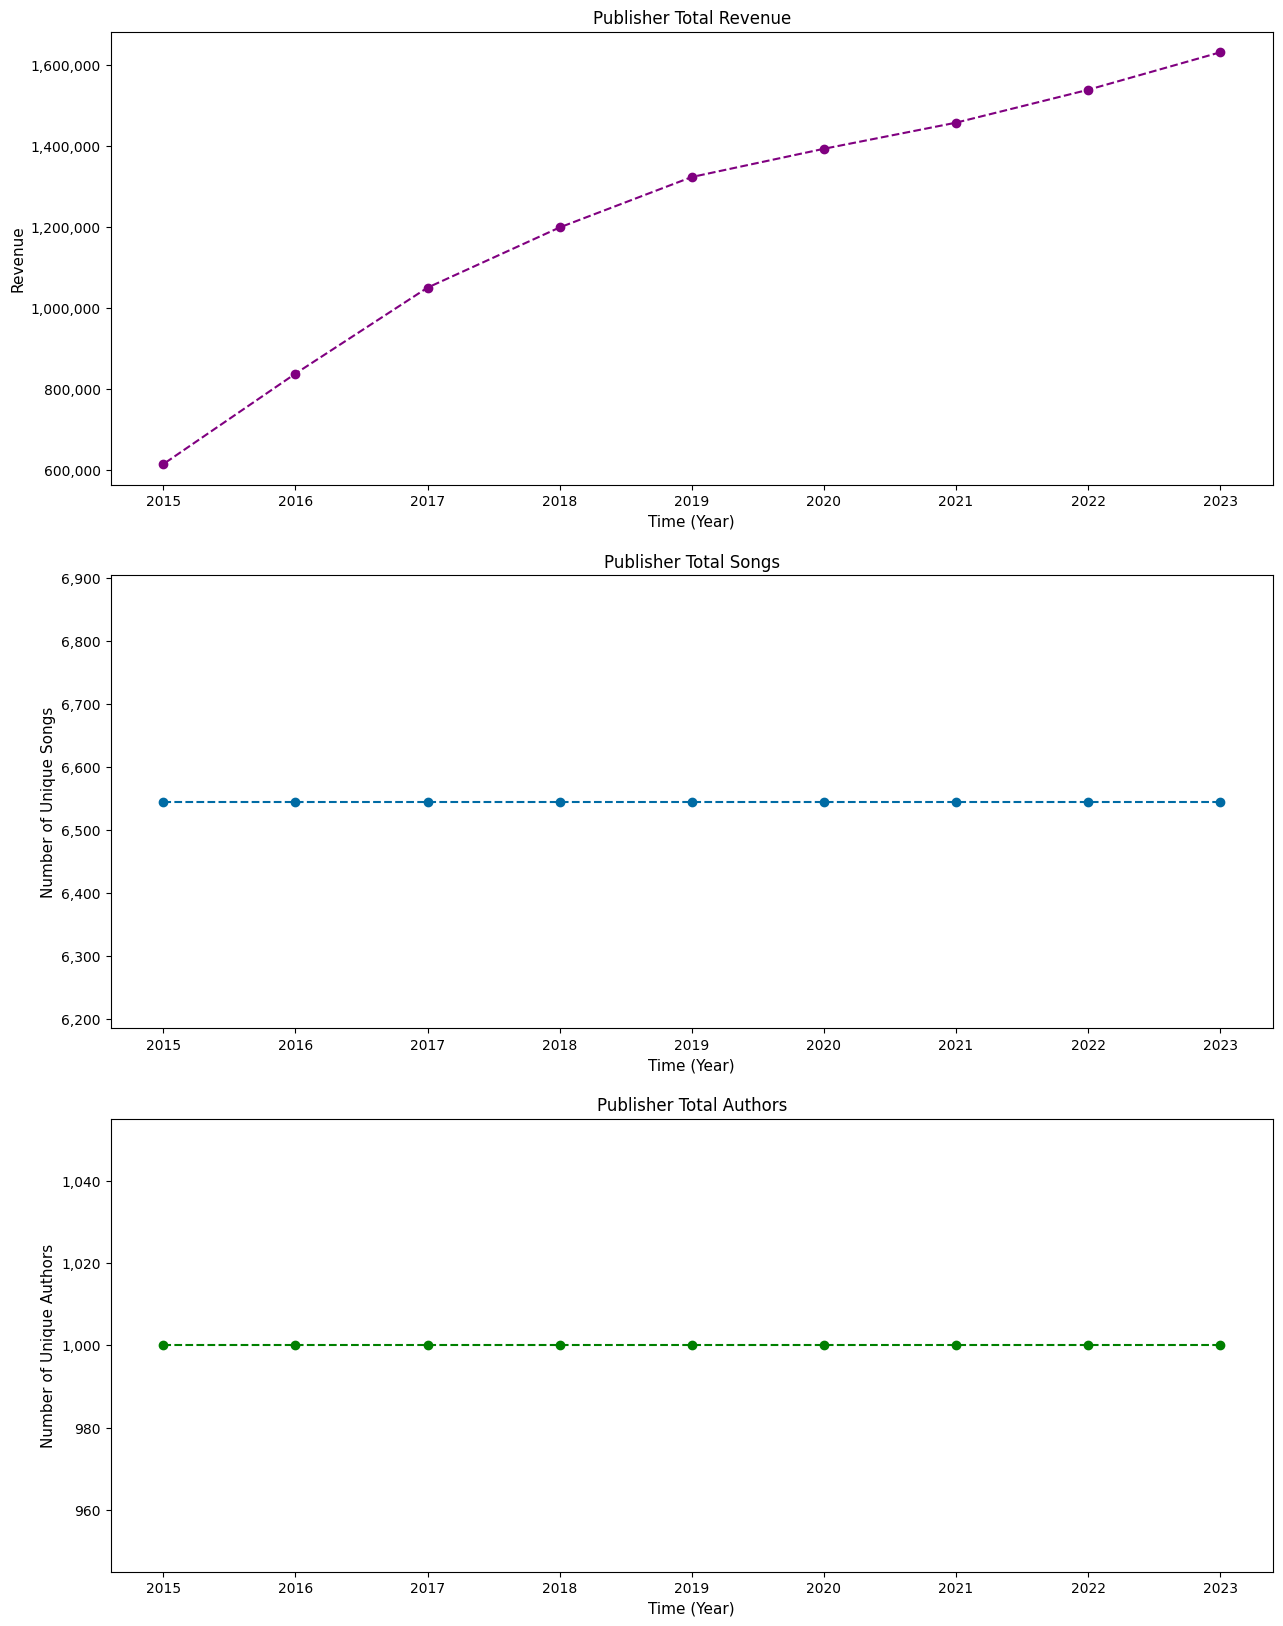

In [ ]:
# Check the growth in Revenue, Songs and Authors by year.
revenue_values = """
SELECT

SUM(revenue) AS revenue,
COUNT(DISTINCT song_id) AS song_count,
COUNT(DISTINCT author_id) AS author_count,
year

--, format
FROM revenue_song GROUP BY Year ORDER BY revenue DESC
"""
revenue = duckdb.sql(revenue_values).df()

songs_values = """
SELECT

SUM(revenue) AS revenue,
--CASE WHEN revenue !=
COUNT(DISTINCT song_id) AS song_count,
year
--, format
FROM revenue_song GROUP BY Year ORDER BY revenue DESC
"""
songs = duckdb.sql(songs_values).df()


# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(3,1, figsize=(15, 20))
n_points = revenue.shape[0]
print(n_points)



ax[0].plot(revenue["year"], revenue["revenue"], color = 'purple', marker = 'o', linestyle = '--')
# Customize the x-axis label
ax[0].set_xlabel("Time (Year)", size = 11)

# Customize the y-axis label
ax[0].set_ylabel("Revenue", size = 11)

# Add the title
ax[0].set_title("Publisher Total Revenue", size = 12)

ax[0].ticklabel_format(style='plain')
ax[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax[1].plot(revenue["year"], revenue["song_count"], marker = 'o', linestyle = '--')

# Customize the x-axis label
ax[1].set_xlabel("Time (Year)", size = 11)

# Customize the y-axis label
ax[1].set_ylabel("Number of Unique Songs", size = 11)

# Add the title
ax[1].set_title("Publisher Total Songs", size = 12)

ax[1].ticklabel_format(style='plain')
ax[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


ax[2].plot(revenue["year"], revenue["author_count"], color = 'green', marker = 'o', linestyle = '--')

# Customize the x-axis label
ax[2].set_xlabel("Time (Year)", size = 11)

# Customize the y-axis label
ax[2].set_ylabel("Number of Unique Authors", size = 11)

# Add the title
ax[2].set_title("Publisher Total Authors", size = 12)

ax[2].ticklabel_format(style='plain')
ax[2].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


In [ ]:
%%sql select

MAX(CAST(STRPTIME(a.birthdate, '%d/%m/%Y') AS DATE)) AS birthdate,
MAX(CAST(STRPTIME(a.sign_date, '%d/%m/%Y') AS DATE)) AS sign_date
from author a


,birthdate,sign_date
0,2018-12-31,2020-12-20


In [ ]:
# Exporting out data model into CSV

%%sql

COPY(

SELECT *,
CASE
  WHEN age >=0 AND age <10 THEN '0-9'
  WHEN age >=10 AND age <20 THEN '10-19'
  WHEN age >=20 AND age <30 THEN '20-29'
  WHEN age >=30 AND age <40 THEN '30-39'
  WHEN age >=40 AND age <50 THEN '40-49'
  WHEN age >=50 AND age <60 THEN '50-59'
  WHEN age >=60 AND age <70 THEN '60-69'
  WHEN age >=70 AND age <80 THEN '70-79'
  WHEN age >=80 AND age <90 THEN '80-89'
  WHEN age >=90 AND age <100 THEN '90-99'
  WHEN age >=100  THEN '100+'
END AS age_group,
CASE
  WHEN membership_duration_in_days <= 364 THEN 'Less than 1 Year'
  WHEN membership_duration_in_days >= 365 AND membership_duration_in_days <= 1095 THEN '1 - 3 Years'
  WHEN membership_duration_in_days >= 1096 AND membership_duration_in_days <= 2189 THEN '3-5 Years'
  WHEN membership_duration_in_days >= 2190 AND membership_duration_in_days <= 3649 THEN '6-9 Years'
  WHEN membership_duration_in_days >= 3650 AND membership_duration_in_days <= 7299 THEN '10-19 Years'
  WHEN membership_duration_in_days >= 7300 AND membership_duration_in_days <= 10949 THEN '20-29 Years'
  WHEN membership_duration_in_days >= 10950 AND membership_duration_in_days <= 14599 THEN '30-39 Years'
  WHEN membership_duration_in_days >= 14600 AND membership_duration_in_days <= 18249 THEN '40-49 Years'
  WHEN membership_duration_in_days >= 18250 AND membership_duration_in_days <= 21899 THEN '50-59 Years'
  WHEN membership_duration_in_days >= 21900 THEN '60+ Years'
END AS tenure_group


FROM (
SELECT
*,
DATEDIFF('day', sign_date, CAST('2023-12-31' AS DATE)) AS membership_duration_in_days,
CAST(ROUND(DATEDIFF('day', birthdate, CAST('2023-12-31' AS DATE))  / 365, 0) AS INT) AS age
FROM (
SELECT
r.author_id,
r.song_id,
r.year,
r.format,
r.revenue,
CAST(STRPTIME(a.birthdate, '%d/%m/%Y') AS DATE) AS birthdate,
CAST(STRPTIME(a.sign_date, '%d/%m/%Y') AS DATE) AS sign_date

FROM revenue_song AS r
LEFT JOIN author AS a
ON r.author_id = a.author_id
))

) TO '/content/twelve/data/staging/publisher_revenue_breakdown.csv' (HEADER, DELIMITER ',');

,Success
